In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/aksha/Desktop/train.csv")

In [3]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.shape

(8523, 12)

In [5]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
df.isnull().sum() #Checking for null values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
df.apply(lambda x : len(x.unique())) #Checking unique values in a column

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [10]:
cat_cols = df.select_dtypes(include=['object']).columns  #Seperating the categorical and numerical columns
num_cols = df.select_dtypes(exclude=['object']).columns

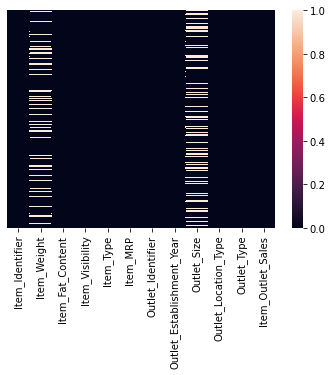

In [11]:
sns.heatmap(df.isnull(), yticklabels=False)

In [12]:
df["Item_Weight"]=df["Item_Weight"].fillna(np.mean(df["Item_Weight"])) #Handling the null values by imputing with mean

In [13]:
df["Outlet_Size"].mode()  #check for mode

0    Medium
dtype: object

In [14]:
df["Outlet_Size"] = df['Outlet_Size'].replace(np.nan, 'Medium')  #Imputing with mode

In [15]:
df.isnull().sum() #Checking for null values

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

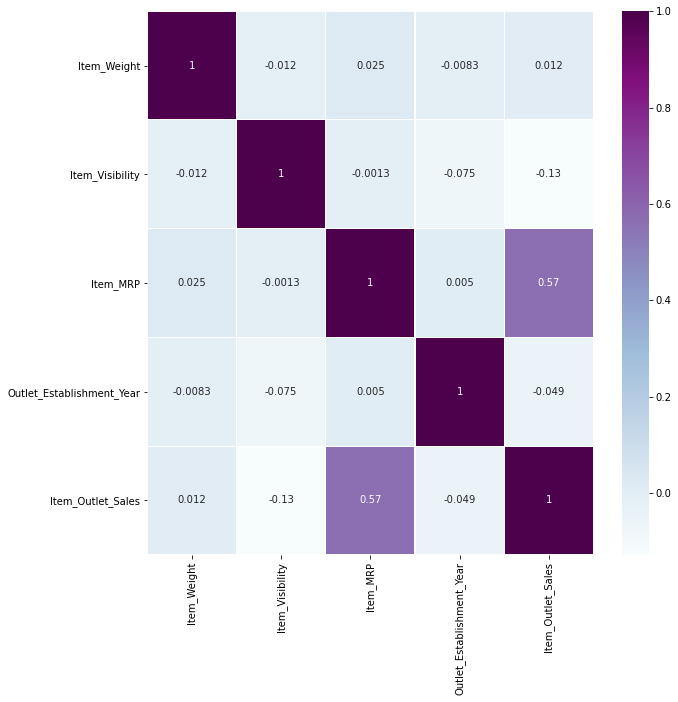

In [20]:
corr_m = df.corr() 
f, ax = plt.subplots(figsize =(10,10)) 
sns.heatmap(corr_m,annot=True, cmap ="BuPu", linewidths = 0.1) 

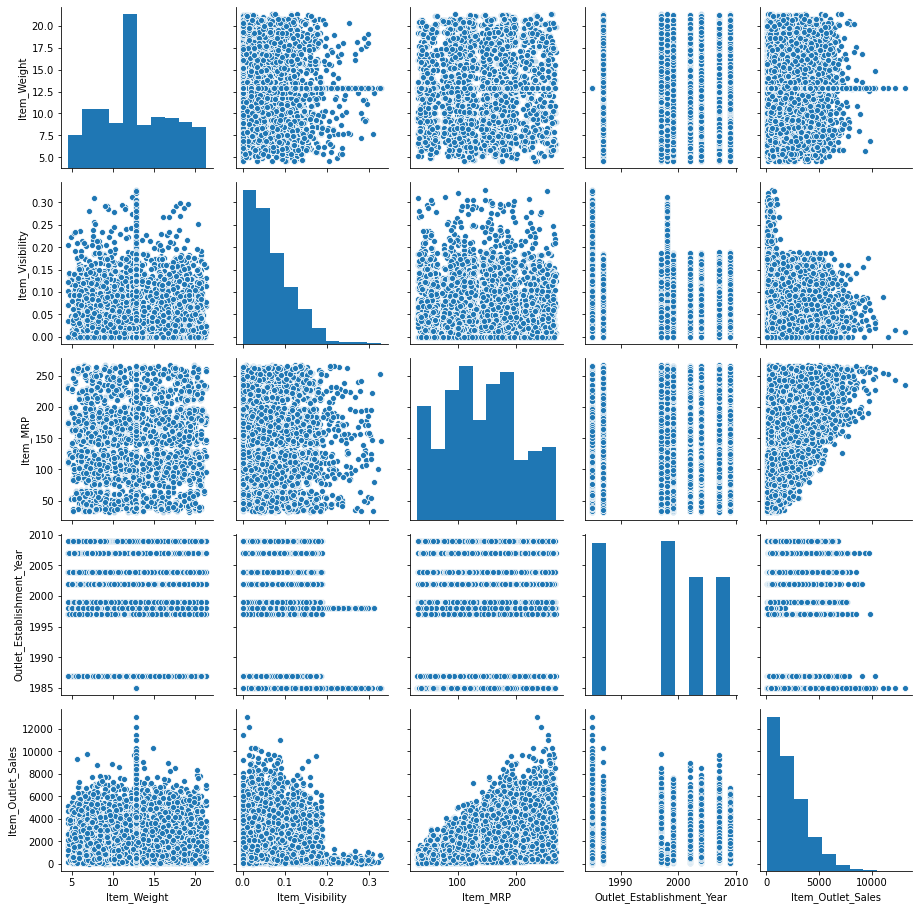

In [21]:
sns.pairplot(df)

In [23]:
df['Item_Fat_Content'].value_counts().sort_index()  #LF 

LF          316
Low Fat    5089
Regular    2889
low fat     112
reg         117
Name: Item_Fat_Content, dtype: int64

In [25]:
df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'},inplace = True) #As we can see lf is same as low fat while reg is same as regular we append the values to respective index.
df['Item_Fat_Content'].value_counts().sort_index()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [26]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


In [28]:
df['Item_Identifier'].unique   #We can say these items can be  categorically classified into 3 groups such as DR,FD,NC.

<bound method Series.unique of 0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object>

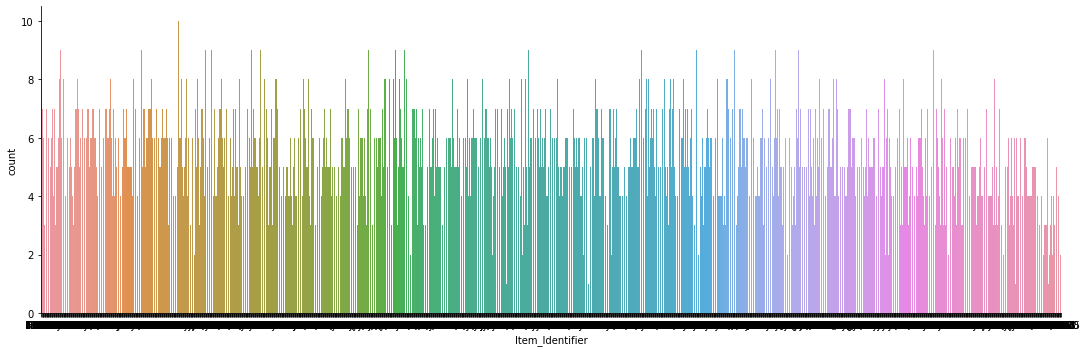

In [32]:
sns.catplot('Item_Identifier',kind = 'count',data = df,aspect =3)

In [33]:
df['Item_Category_Id'] =df['Item_Identifier'].replace({'^FD[A-Z]*[0-9]*':'FD','^DR[A-Z]*[0-9]*':'DR','^NC[A-Z]*[0-9]*':'NC'},regex = True)

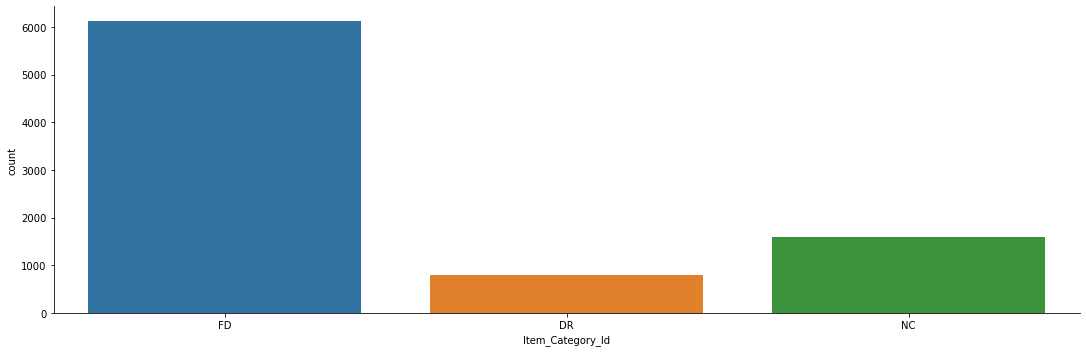

In [34]:
sns.catplot('Item_Category_Id',kind = 'count',data = df,aspect =3)

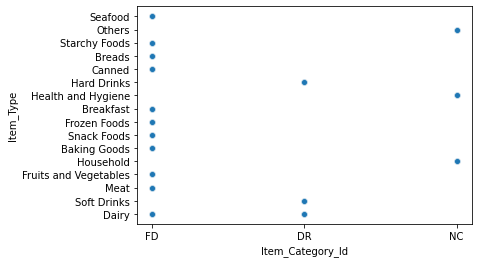

In [35]:
sns.scatterplot(x = 'Item_Category_Id',y = 'Item_Type',data = df,alpha = 0.5)

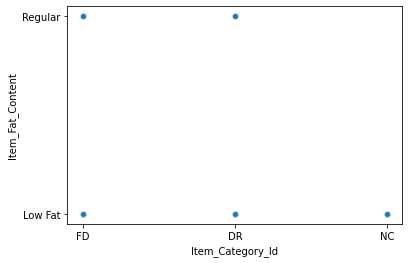

In [36]:
sns.scatterplot(x = 'Item_Category_Id',y = 'Item_Fat_Content',data = df,alpha = 0.5);

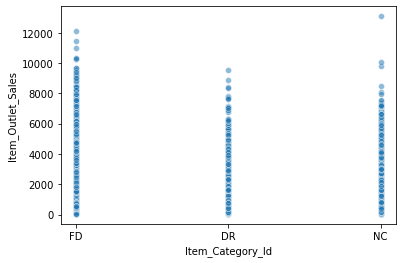

In [37]:
sns.scatterplot(x = 'Item_Category_Id',y = 'Item_Outlet_Sales',data = df,alpha = 0.5);

In [38]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [39]:
Breakfast = ["Breads", "Breakfast", "Dairy", "Fruits and Vegetables","Snack Foods"]
Drinks= ["Soft Drinks", "Hard Drinks","Canned"]
NV=["Meat","Frozen Foods","Seafood"]
Others=["Household","Baking Goods","Health and Hygiene","Others","Starchy Foods"]

In [40]:
items_list=[]
for i in df['Item_Type']:
    if i in Breakfast:
        items_list.append('Breakfast')
    elif (i in Drinks):
        items_list.append('Drinks')
    elif (i in NV):
        items_list.append('NV')    
    elif (i in Others):
        items_list.append('Others')      
df['Item_Type_new'] = items_list

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Outlet_Size']= le.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = le.fit_transform(df['Outlet_Location_Type'])
df['Item_Fat_Content'] = le.fit_transform(df['Item_Fat_Content'])
df['Outlet_Identifier'] = le.fit_transform(df['Outlet_Identifier'])
df['Outlet_Type'] = le.fit_transform(df['Outlet_Type'])
df['Item_Identifier'] = le.fit_transform(df['Item_Identifier'])
df['Item_Type_new'] = le.fit_transform(df['Item_Type_new'])
df['Item_Category_Id'] = le.fit_transform(df['Item_Category_Id'])

In [44]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category_Id,Item_Type_new
0,156,9.30,0,0.016047,Dairy,249.8092,9,1999,1,0,1,3735.1380,1,0
1,8,5.92,1,0.019278,Soft Drinks,48.2692,3,2009,1,2,2,443.4228,0,1
2,662,17.50,0,0.016760,Meat,141.6180,9,1999,1,0,1,2097.2700,1,2
3,1121,19.20,1,0.000000,Fruits and Vegetables,182.0950,0,1998,1,2,0,732.3800,1,0
4,1297,8.93,0,0.000000,Household,53.8614,1,1987,0,2,1,994.7052,2,3


In [45]:
df = pd.get_dummies(df, columns=['Item_Category_Id','Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                     'Item_Type_new','Outlet_Identifier'])

In [46]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
min_max_scaler = preprocessing.MinMaxScaler()

In [47]:
df['Item_Identifier'] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(df['Item_Identifier'])))

In [50]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales',
       'Item_Category_Id_0', 'Item_Category_Id_1', 'Item_Category_Id_2',
       'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3', 'Item_Type_new_0', 'Item_Type_new_1',
       'Item_Type_new_2', 'Item_Type_new_3', 'Outlet_Identifier_0',
       'Outlet_Identifier_1', 'Outlet_Identifier_2', 'Outlet_Identifier_3',
       'Outlet_Identifier_4', 'Outlet_Identifier_5', 'Outlet_Identifier_6',
       'Outlet_Identifier_7', 'Outlet_Identifier_8', 'Outlet_Identifier_9'],
      dtype='object')

In [57]:
X=df.drop(['Item_Outlet_Sales','Item_Type'],axis=1)
y=df['Item_Outlet_Sales']

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [91]:
lm= LinearRegression()
lm.fit(X_train,y_train)
y_pred=L_R.predict(X_test)

In [61]:
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [92]:
r2scores= r2_score(y_test,y_pred)
rmses= sqrt(mean_squared_error(y_test,y_pred))
print("r2scores1 : ",r2scores)
print("rmses1 : ",rmses)
L_R.score(X_train,y_train),L_R.score(X_test,y_test)
print(L_R.intercept_)

r2scores1 :  0.5966257556493438
rmses :  1095.9742764294817
36010.758746920445


In [68]:
from sklearn.metrics import mean_absolute_error
m_a_e=mean_absolute_error(y_test, y_pred)
print(m_a_e)

815.8053614508603


In [69]:
#rmse
mse1=mean_squared_error(y_test,y_pred)
L_R_score=np.sqrt(mse1)
L_R_score

1095.9742764294817

In [72]:
#cross_val
from sklearn.model_selection import cross_val_score
score=cross_val_score(L_R,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
L_R_score_cross=np.sqrt(-score)
print(np.mean(L_R_score_cross),np.std(L_R_score_cross))

1138.5618551822658 26.20807512112215


In [73]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
4258,2865.6032,2871.506382
2574,2607.2728,2059.636497
517,372.8480,526.489512
3004,850.8924,2025.014974
2159,164.4526,703.838727
...,...,...
5885,2993.4368,2974.122710
3645,852.8898,61.999201
7023,5020.1320,2964.245011
876,2266.3832,2552.332343


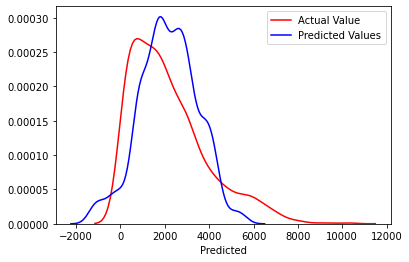

In [74]:
ax1 = sns.distplot(df1['Actual'], hist=False, color="red", label="Actual Value")
sns.distplot(df1['Predicted'], hist=False, color="blue", label="Predicted Values" , ax=ax1)

In [ ]:
#using RandomForestRegressor

In [75]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred2=rf.predict(X_test)

In [76]:
mse2=mean_squared_error(y_test,y_pred2)
rf_score=np.sqrt(mse2)
rf_score

1102.7659654713614

In [97]:
r2scores2= r2_score(y_test,y_pred2)
r2scores2

0.5916108916293242

In [78]:
#cross_val
rf=RandomForestRegressor()
score=cross_val_score(rf,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
rf_score_cross=np.sqrt(-score)
print(np.mean(rf_score_cross),np.std(rf_score_cross))

1136.2836849087357 29.34752494136325


In [79]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2})
df2

,Actual,Predicted
4258,2865.6032,2768.629430
2574,2607.2728,1531.040390
517,372.8480,789.239320
3004,850.8924,1723.782832
2159,164.4526,363.793120
...,...,...
5885,2993.4368,2905.810862
3645,852.8898,382.435520
7023,5020.1320,3250.615366
876,2266.3832,1692.117384


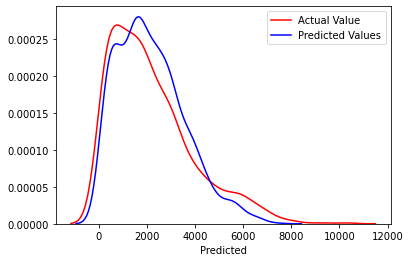

In [80]:
ax1 = sns.distplot(df2['Actual'], hist=False, color="red", label="Actual Value")
sns.distplot(df2['Predicted'], hist=False, color="blue", label="Predicted Values" , ax=ax1)

In [81]:
#Using LassoCV
from sklearn.linear_model import LassoCV
m_l = LassoCV(alphas = [1, 0.1, 0.001, 0.0005])
m_l.fit(X_train, y_train)

C:\Users\aksha\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 499466084.2224245, tolerance: 1591123.7655211587
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\aksha\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2748396.6799087524, tolerance: 1591123.7655211587
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\aksha\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 136994990.4566927, tolerance: 1585593.4351838247
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\aksha\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525

LassoCV(alphas=[1, 0.1, 0.001, 0.0005])

In [82]:
y_pred3 = m_l.predict(X_test)
mse3=mean_squared_error(y_test,y_pred3)
mse3

1200578.5524433255

In [83]:
score=np.sqrt(mse3)
score

1095.7091550422153

In [84]:
r2scores_3= r2_score(y_test,y_pred3)
r2scores_3

0.5968208883390841

In [85]:
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred3})
df3

,Actual,Predicted
4258,2865.6032,2871.111369
2574,2607.2728,2053.012912
517,372.8480,516.806420
3004,850.8924,2025.073916
2159,164.4526,716.342086
...,...,...
5885,2993.4368,2970.348627
3645,852.8898,46.203209
7023,5020.1320,3000.507119
876,2266.3832,2529.656689


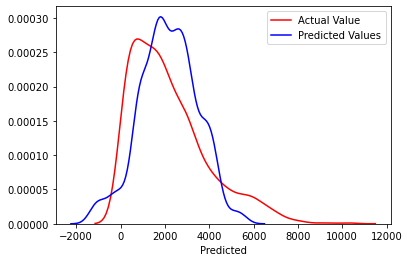

In [86]:
import seaborn as sns
ax1 = sns.distplot(df3['Actual'], hist=False, color="red", label="Actual Value")
sns.distplot(df3['Predicted'], hist=False, color="blue", label="Predicted Values" , ax=ax1)

In [98]:
mse1,mse2,mse3

(1201159.614595126, 1216092.7746019838, 1200578.5524433255)

In [88]:
L_R_score, rf_score ,score

(1095.9742764294817, 1102.7659654713614, 1095.7091550422153)

In [89]:
F_scores = {'Model':  ['L_R', 'RF_R','LASSO'],
         'RMSE': [L_R_score, rf_score ,score],
            'R2': [r2scores,r2scores_2,r2scores_3]}

In [90]:
df_scores = pd.DataFrame (F_scores, columns = ['Model','RMSE','R2'])
df_scores

,Model,RMSE,R2
0,L_R,1095.974276,0.596626
1,RF_R,1102.765965,0.591611
2,LASSO,1095.709155,0.596821
